In [210]:
import pandas as pd
import seaborn as sns
from os import path
import matplotlib.pyplot as plt

df = pd.read_csv(path.join('img', 'dataset_file_storage.csv'), sep=';')
df.uploadServerUnixTime = pd.to_datetime(df.uploadServerUnixTime * 10 ** 9)
df


,ProjectID,UserID,uploadServerUnixTime,CompanyID,FileSize,TypeDocs
0,753919,27549,2020-02-21 08:07:23,753918,732686,6.Юридические документы
1,726628,26990,2020-02-20 16:33:36,726615,2484373,8.Другие документы
2,705607,26912,2019-10-22 08:14:37,703124,22,1.Основные документы
3,705605,26912,2019-10-14 10:23:41,703124,4,1.Основные документы
4,705605,26912,2019-10-11 13:06:50,703124,1030735,1.Основные документы
...,...,...,...,...,...,...
1847,753919,27549,2020-02-20 09:49:55,753918,51551,3.Материалы для KYC
1848,749900,27543,2020-02-25 09:29:28,749892,106970,6.Юридические документы
1849,755110,27557,2020-02-27 10:56:14,755109,112834,8.Другие документы
1850,741922,26996,2020-02-10 06:45:08,741921,138990,6.Юридические документы


Удаляем значения за март и октябрь, т.к их мало

In [211]:
df = df[(df.uploadServerUnixTime.dt.month != 3) & (df.uploadServerUnixTime.dt.month != 10)]
df.groupby(df.uploadServerUnixTime.dt.strftime('%B')).count()

,ProjectID,UserID,uploadServerUnixTime,CompanyID,FileSize,TypeDocs
uploadServerUnixTime,,,,,,
December,348,348,348,348,348,348
February,400,400,400,400,400,400
January,351,351,351,351,351,351
November,700,700,700,700,700,700


In [212]:
# sns.histplot(x = df.uploadServerUnixTime.dt.strftime('%B'), y = 'FileSize', data = df, multiple='stack')
# df_gr_month = df[['uploadServerUnixTime', 'FileSize']].sort_values(by='uploadServerUnixTime', ascending=False).groupby(df.uploadServerUnixTime.dt.strftime('%Y-%m-%d')).sum(['FileSize'])
df_gr_month = df[['uploadServerUnixTime', 'FileSize']].sort_values(by='uploadServerUnixTime', ascending=False).groupby(pd.Grouper(key="uploadServerUnixTime", freq="D")).sum(['FileSize'])
df_gr_month.reset_index(inplace=True)
df_gr_month

,uploadServerUnixTime,FileSize
0,2019-11-01,890000000
1,2019-11-02,0
2,2019-11-03,0
3,2019-11-04,0
4,2019-11-05,5
...,...,...
115,2020-02-24,0
116,2020-02-25,79350128
117,2020-02-26,119462503
118,2020-02-27,33374132


<Axes: title={'center': 'Объём хранилища'}, xlabel='Дата', ylabel='Суммарный объём хранилища, байт'>

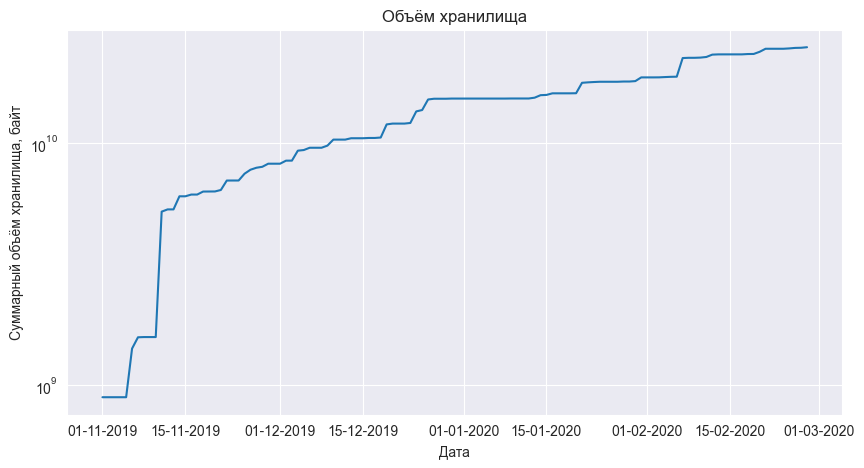

In [234]:
from matplotlib.dates import AutoDateLocator, DateFormatter

fig, ax = plt.subplots(figsize=(10, 5))
plt.yscale('symlog')
ax.set_title('Объём хранилища')
plt.ylabel('Суммарный объём хранилища, байт')
plt.xlabel('Дата')
ax.xaxis.set_major_locator(AutoDateLocator(maxticks=12))
ax.xaxis.set_major_formatter(DateFormatter('%d-%m-%Y'))

sns.lineplot(x='uploadServerUnixTime', y=df_gr_month.FileSize.cumsum(), data=df_gr_month, ax=ax)

In [214]:
df.groupby(df.uploadServerUnixTime.dt.weekday).count()

,ProjectID,UserID,uploadServerUnixTime,CompanyID,FileSize,TypeDocs
uploadServerUnixTime,,,,,,
0,532,532,532,532,532,532
1,324,324,324,324,324,324
2,242,242,242,242,242,242
3,399,399,399,399,399,399
4,216,216,216,216,216,216
5,86,86,86,86,86,86


Text(0, 0.5, 'Кол-во загрузок')

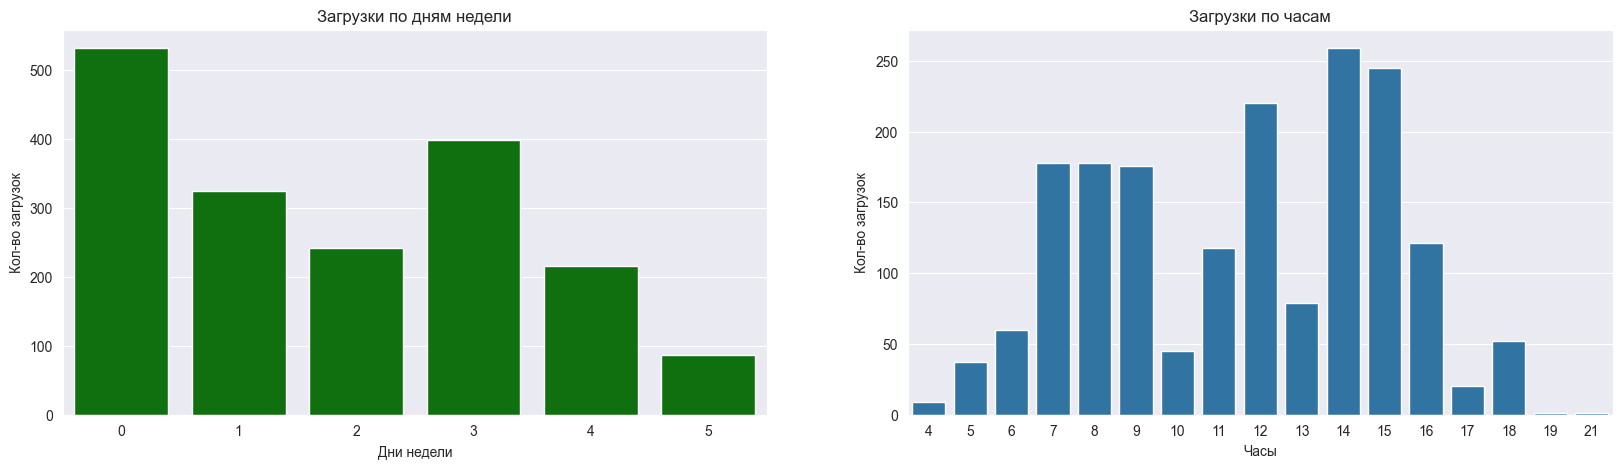

In [233]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5))
# ax[0].xaxis.set_major_formatter(DateFormatter('%A'))

ax[0].set_ylabel('Кол-во загрузок')
ax[0].set_xlabel('Дни недели')
ax[0].set_title('Загрузки по дням недели')
ax[1].set_title('Загрузки по часам')
ax[1].set_xlabel('Часы')
sns.countplot(x=df.uploadServerUnixTime.dt.weekday, data=df, ax=ax[0], color='g')
sns.countplot(x=df.uploadServerUnixTime.dt.hour, data=df, ax=ax[1])
plt.ylabel('Кол-во загрузок')

In [249]:
df.groupby('TypeDocs').count()

,ProjectID,UserID,uploadServerUnixTime,CompanyID,FileSize
TypeDocs,,,,,
1.Основные документы,508,508,508,508,508
2.Технические условия,161,161,161,161,161
3.Материалы для KYC,74,74,74,74,74
4.Презентация по проекту,20,20,20,20,20
5.Финансовые документы,329,329,329,329,329
6.Юридические документы,351,351,351,351,351
7.Cмешанный проект,3,3,3,3,3
8.Другие документы,353,353,353,353,353


<Axes: ylabel='CompanyID'>

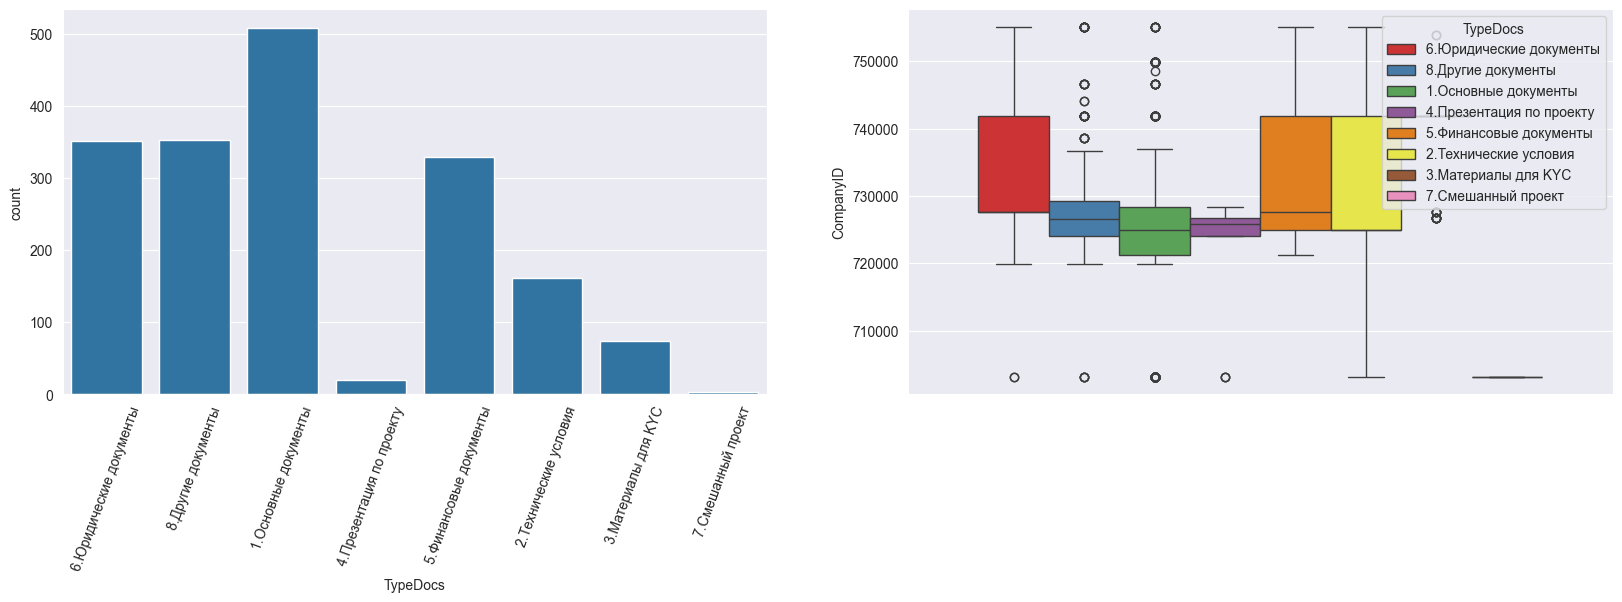

In [256]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5))
ax[0].tick_params(axis='x', rotation=70)
ax[1].tick_params(axis='x', rotation=70)
sns.countplot(x='TypeDocs', data=df, ax=ax[0])
sns.boxplot(hue='TypeDocs', data=df, ax=ax[1], y='CompanyID', palette='Set1', )

Задание №4
Постройте гистограмму суммарного объёма файлов по проектам (используйте логарифмическую шкалу для объёма).

<Axes: ylabel='FileSize'>

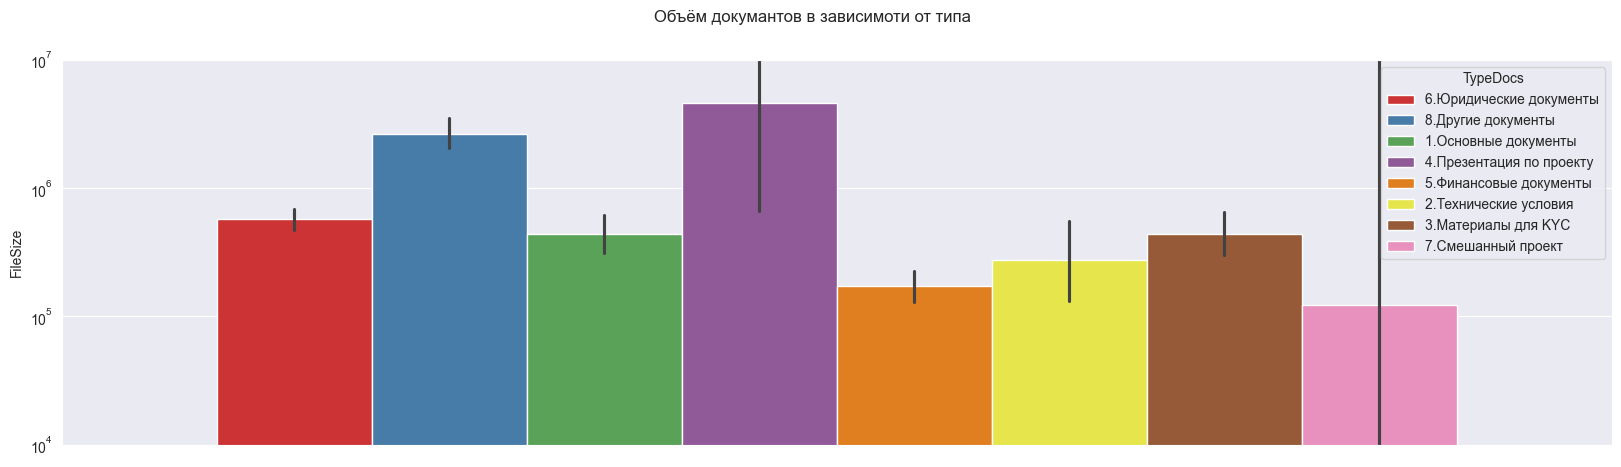

In [228]:
# df_gr_doc = df[['FileSize','TypeDocs']].groupby('TypeDocs').sum('FileSize')
fig, ax = plt.subplots(figsize=(20, 5))
fig.suptitle('Объём докумантов в зависимоти от типа')
ax.set_yscale('symlog')
ax.set_ylim(ymin=10**4, ymax=10**7)
sns.barplot(data=df, hue='TypeDocs', y='FileSize', ax=ax, palette='Set1')

Задание №5
Постройте ящики с усами для размеров загружаемых файлов по компаниям.

<Axes: ylabel='FileSize'>

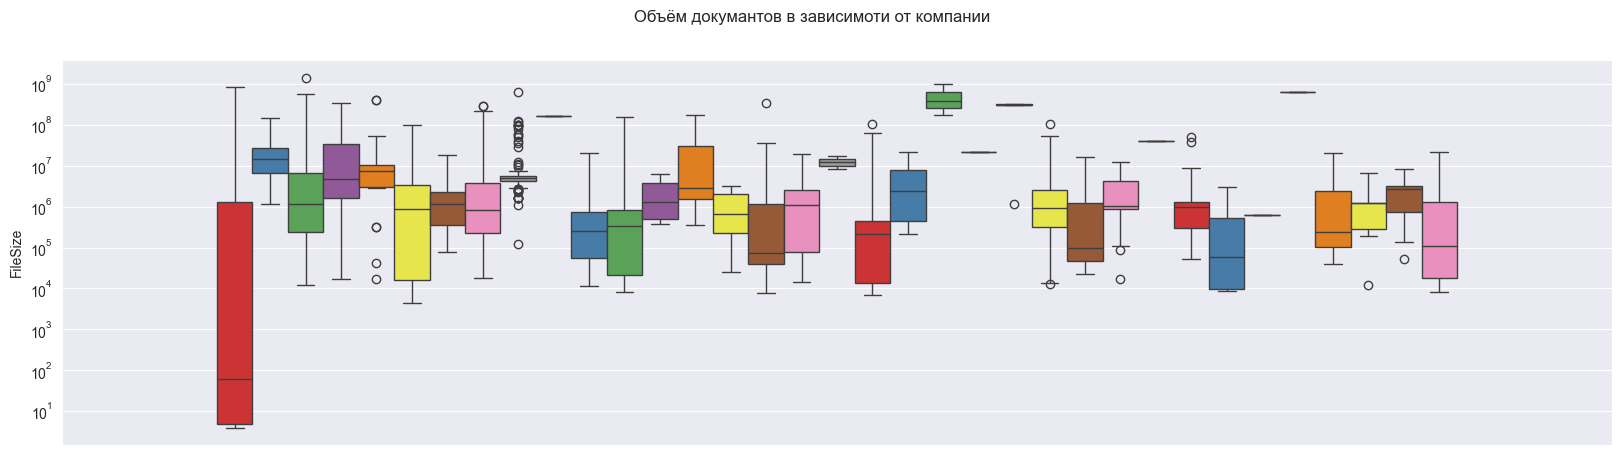

In [218]:
fig, ax = plt.subplots(figsize=(20, 5))
ax.set_yscale('log')
ax.tick_params(axis='x', rotation=70)
fig.suptitle('Объём докумантов в зависимоти от компании')
sns.boxplot(hue="CompanyID", y='FileSize', data=df, palette='Set1', legend=False)